VTC Academy AI Specialist - Lesson 01 : Data Mining Pipeline and Preprocessing 

In [ ]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [ ]:
# User-define Variables and Setup
import warnings
warnings.filterwarnings("ignore")

WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Lesson 01"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

FileNotFoundError: ignored

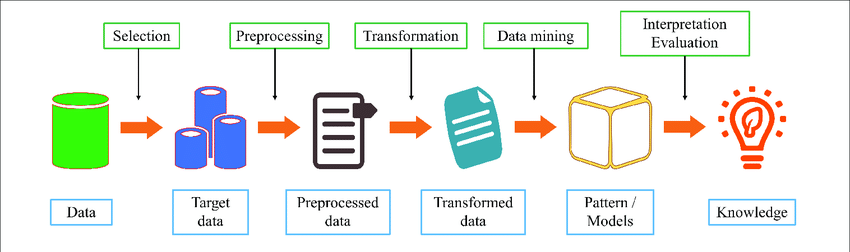

In [ ]:
display(Image(filename='Data Mining Process 01.png'))

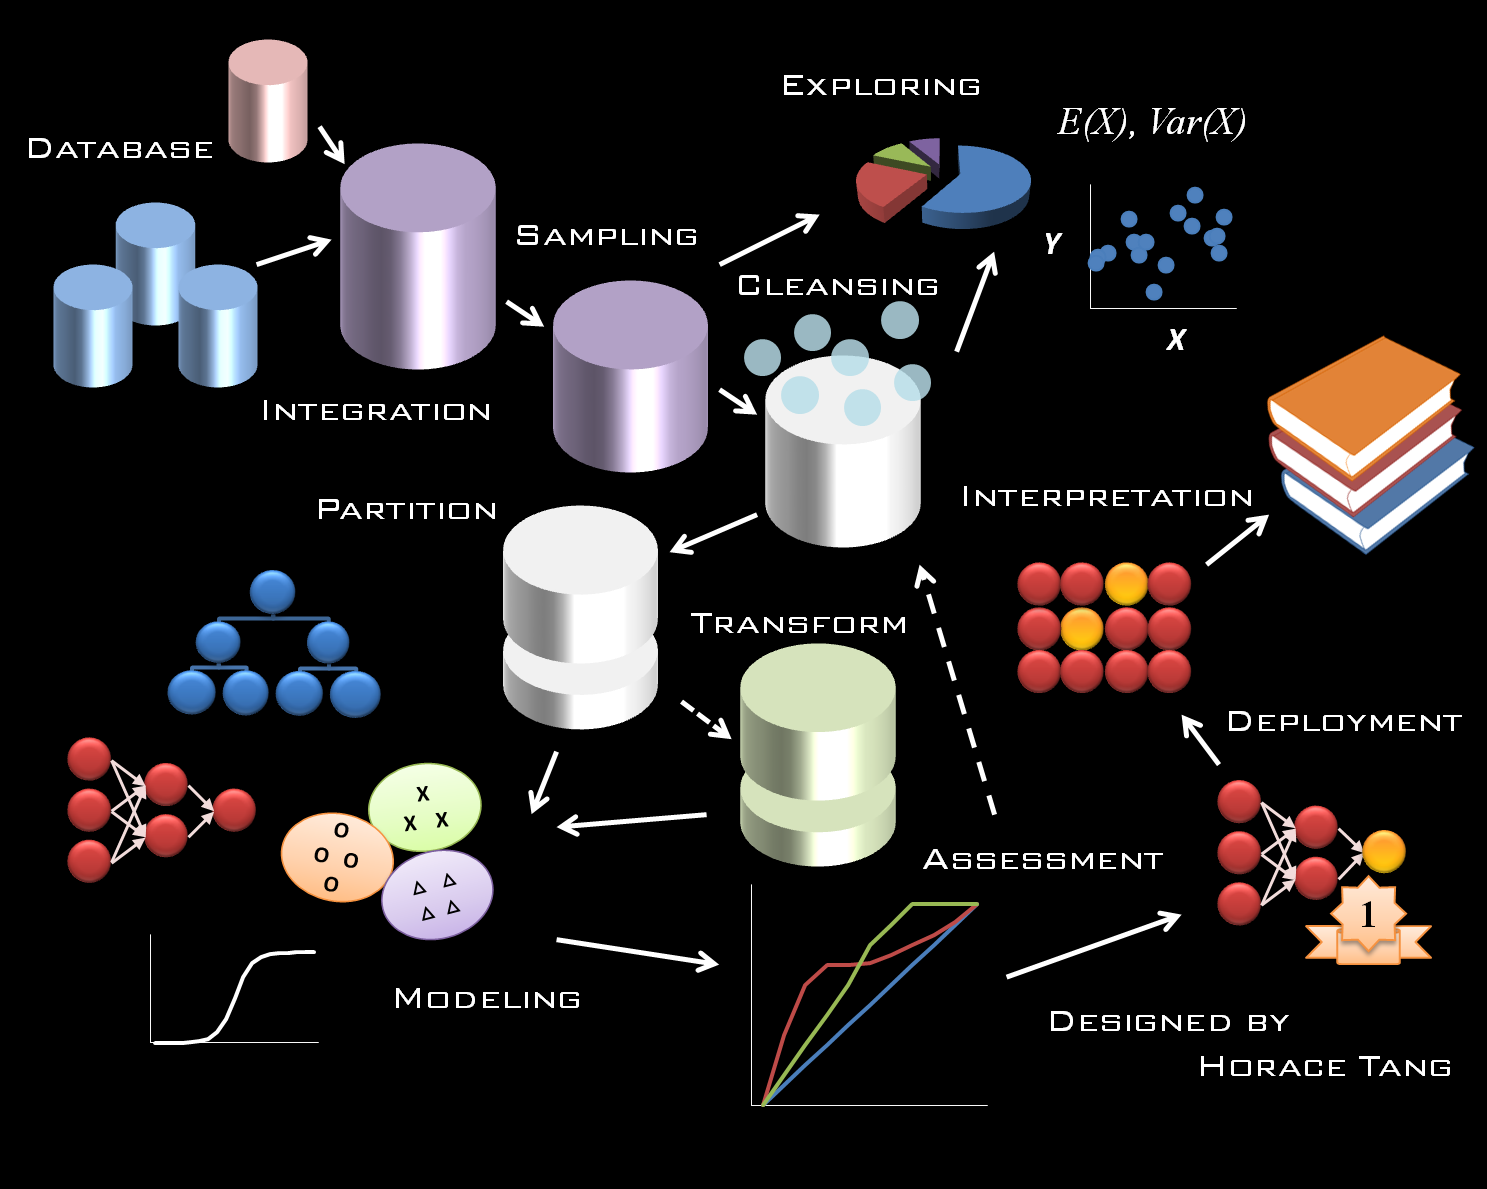

In [ ]:
display(Image(filename='Data Mining Process 02.png'))

In [ ]:
  # Data Itegration and Display
path_Data = "Humidity_Temp_Prediction.csv"
data = pd.read_csv(path_Data,delimiter=';',parse_dates=['date_time'])

display(data.head(10))

,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01
5,9202,21,20,2016-08-17 00:05:02
6,9203,21,20,2016-08-17 00:06:01
7,9204,21,20,2016-08-17 00:07:01
8,9205,20,21,2016-08-17 00:08:01
9,9206,21,20,2016-08-17 00:09:01


In [ ]:
# Data Exploring and Transformation
data['minute'] = data['date_time'].dt.minute
data['hour'] = data['date_time'].dt.hour
data['day_of_week'] = data['date_time'].dt.day_name()
data['month'] = data['date_time'].dt.month
data['minute']=data['minute']+data['hour']*60
data.drop('id',inplace=True,axis=1)

data.head(10)

,temp,humidity,date_time,minute,hour,day_of_week,month
0,21,20,2016-08-17 00:00:01,0,0,Wednesday,8
1,21,20,2016-08-17 00:01:01,1,0,Wednesday,8
2,21,20,2016-08-17 00:02:01,2,0,Wednesday,8
3,21,20,2016-08-17 00:03:01,3,0,Wednesday,8
4,21,20,2016-08-17 00:04:01,4,0,Wednesday,8
5,21,20,2016-08-17 00:05:02,5,0,Wednesday,8
6,21,20,2016-08-17 00:06:01,6,0,Wednesday,8
7,21,20,2016-08-17 00:07:01,7,0,Wednesday,8
8,20,21,2016-08-17 00:08:01,8,0,Wednesday,8
9,21,20,2016-08-17 00:09:01,9,0,Wednesday,8


In [ ]:
# Data Exploring and Transformation
CategoryStatsDF = data.describe(exclude=[np.number])  
display(CategoryStatsDF)

,date_time,day_of_week
count,619999,619999
unique,619985,7
top,2017-11-04 17:43:33,Thursday
freq,3,91761
first,2016-08-17 00:00:01,NaN
last,2017-12-17 03:17:02,NaN


In [ ]:
# Data Exploring and Transformation
NumericStatsDF = data.describe(include=[np.number])  
display(NumericStatsDF)

,temp,humidity,minute,hour,month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,19.365405,41.340391,715.723067,11.436893,7.460789
std,1.523185,32.418998,417.192832,6.946960,3.360717
min,15.000000,16.000000,0.000000,0.000000,1.000000
25%,18.000000,20.000000,354.000000,5.000000,5.000000
50%,19.000000,21.000000,711.000000,11.000000,8.000000
75%,20.000000,95.000000,1079.000000,17.000000,10.000000
max,28.000000,95.000000,1439.000000,23.000000,12.000000


In [ ]:
# Data Exploring and Transformation
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for column in data.columns:
    if(is_string_dtype(data[column])):
        freqDF = data[column].value_counts()
        display(freqDF.head(20))
        print("**"*30)
    else:
        minV = data[column].min()
        maxV = data[column].max()
        print(f"Column {column} has min : {minV} and max : {maxV}")
        print("**"*30)

Column temp has min : 15 and max : 28
************************************************************
Column humidity has min : 16 and max : 95
************************************************************
Column date_time has min : 2016-08-17 00:00:01 and max : 2017-12-17 03:17:02
************************************************************
Column minute has min : 0 and max : 1439
************************************************************
Column hour has min : 0 and max : 23
************************************************************


Thursday     91761
Wednesday    90486
Friday       90365
Saturday     89407
Tuesday      88178
Monday       84953
Sunday       84849
Name: day_of_week, dtype: int64

************************************************************
Column month has min : 1 and max : 12
************************************************************


In [ ]:
# Data Partition
X1=data[data['day_of_week']=='Monday']
X2=data[data['day_of_week']=='Tuesday']
X3=data[data['day_of_week']=='Wednesday']
X4=data[data['day_of_week']=='Thursday']
X5=data[data['day_of_week']=='Friday']
X6=data[data['day_of_week']=='Saturday']
X7=data[data['day_of_week']=='Sunday']

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(X5.shape)
print(X6.shape)
print(X7.shape)

(84953, 7)
(88178, 7)
(90486, 7)
(91761, 7)
(90365, 7)
(89407, 7)
(84849, 7)


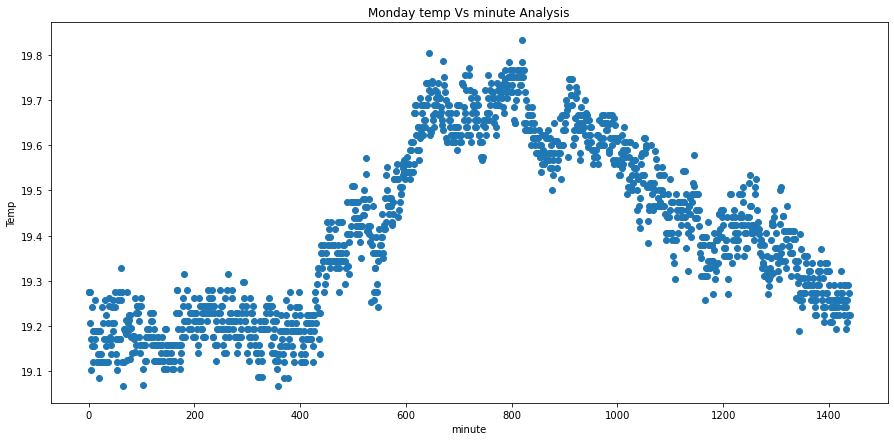

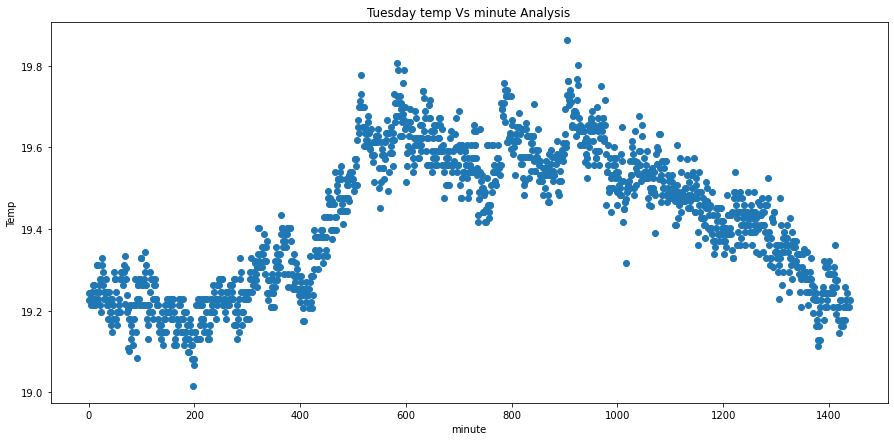

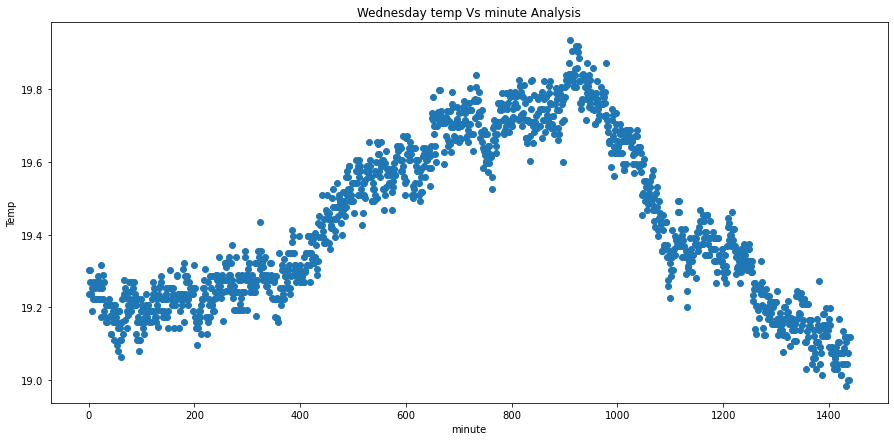

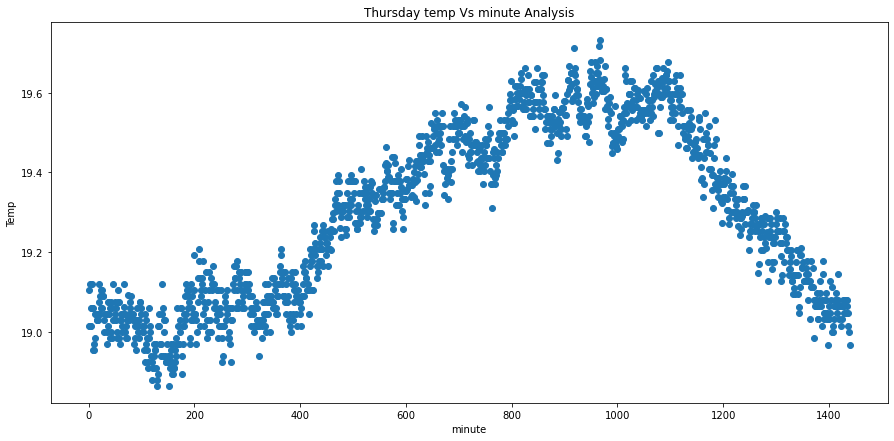

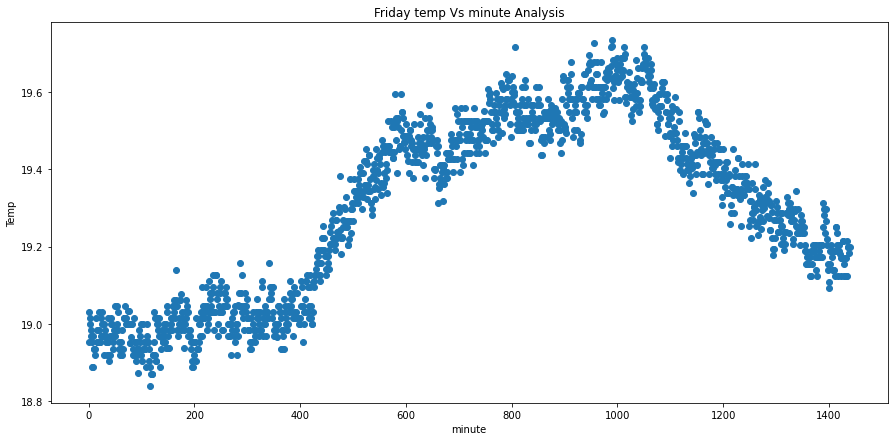

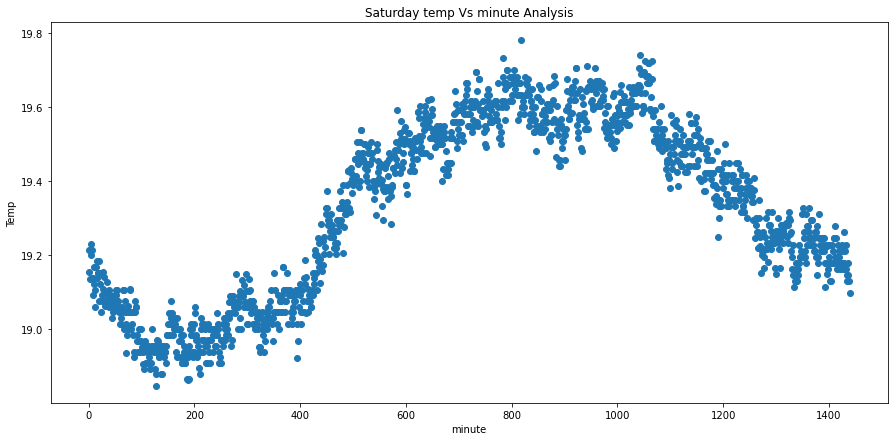

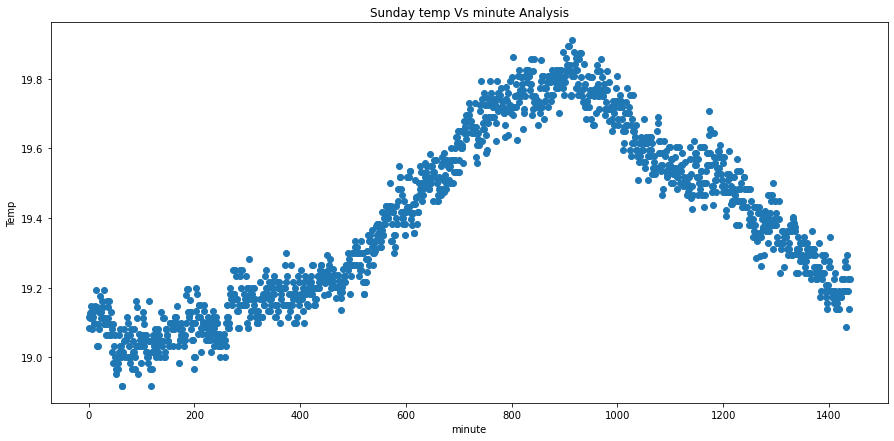

In [ ]:
# Data Visualization
dataByWeekDay = (X1, X2, X3, X4, X5, X6, X7)
daynameList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
feature1 = 'temp'
feature2 = 'minute'

for dayname, X in zip(daynameList, dataByWeekDay):
    plt.figure(figsize=(15,7))
    byh = X.loc[:,[feature1,feature2]].groupby(feature2,as_index=False).mean()
    plt.scatter(byh[feature2],byh[feature1])
    plt.title(f'{dayname} {feature1} Vs {feature2} Analysis')
    plt.xlabel(feature2)
    plt.ylabel('Temp')
    plt.savefig(f'{dayname} {feature1} Vs {feature2} Analysis.jpg')

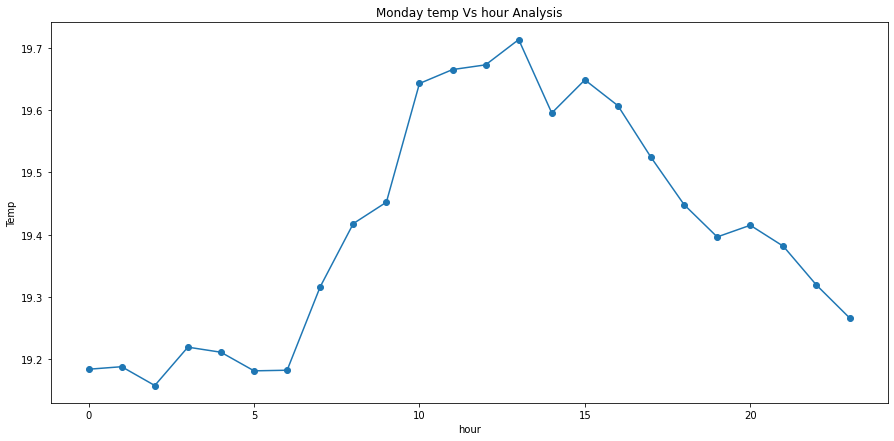

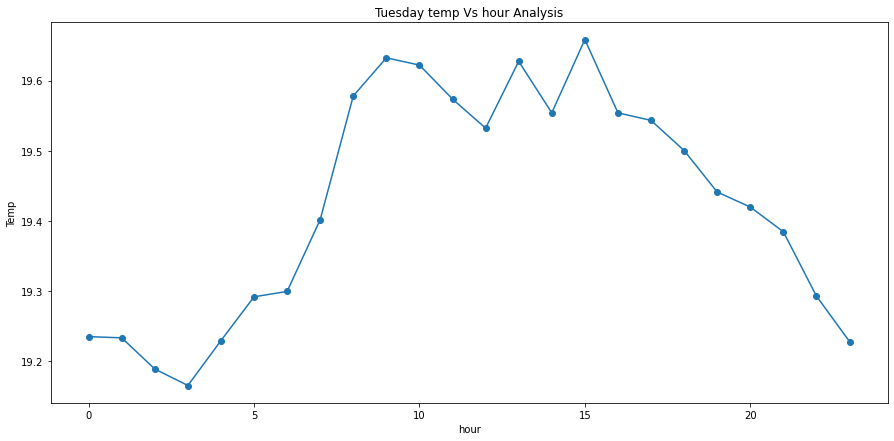

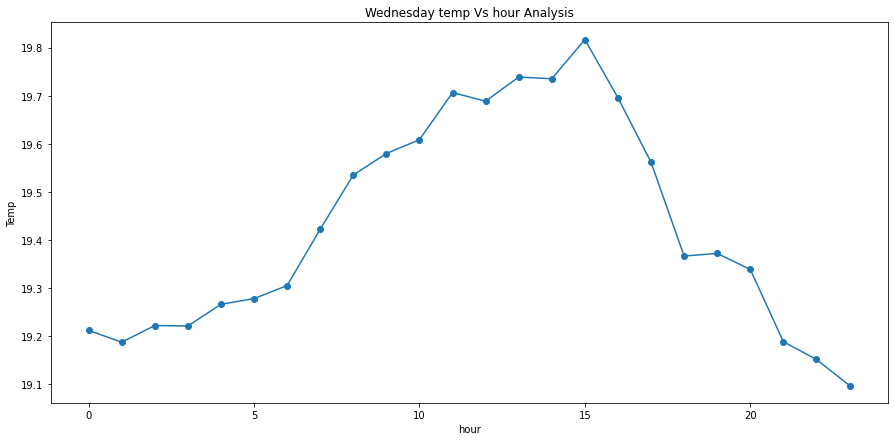

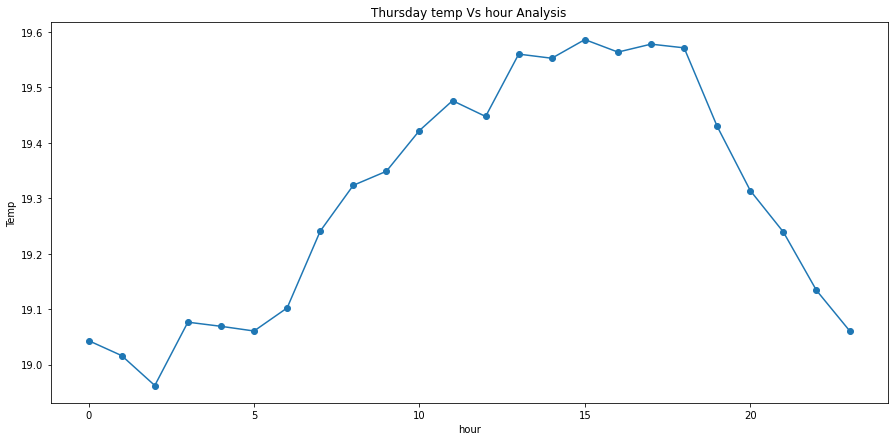

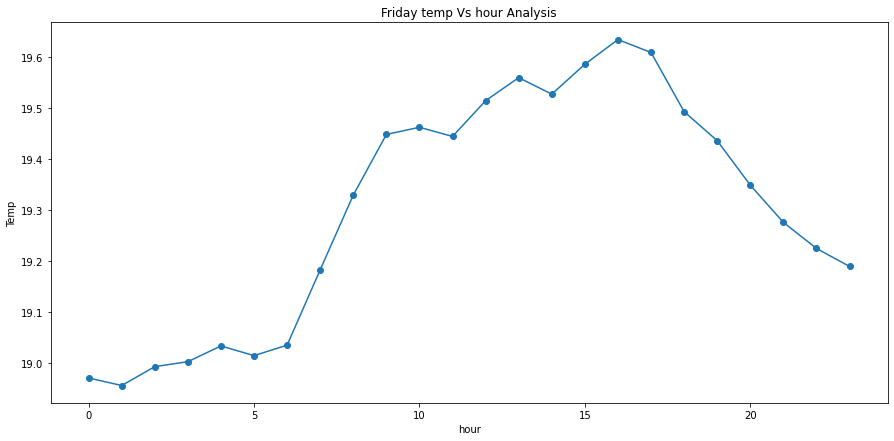

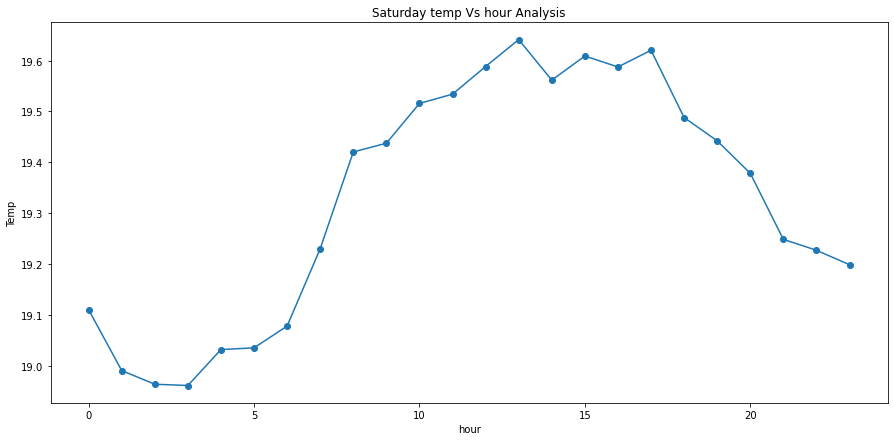

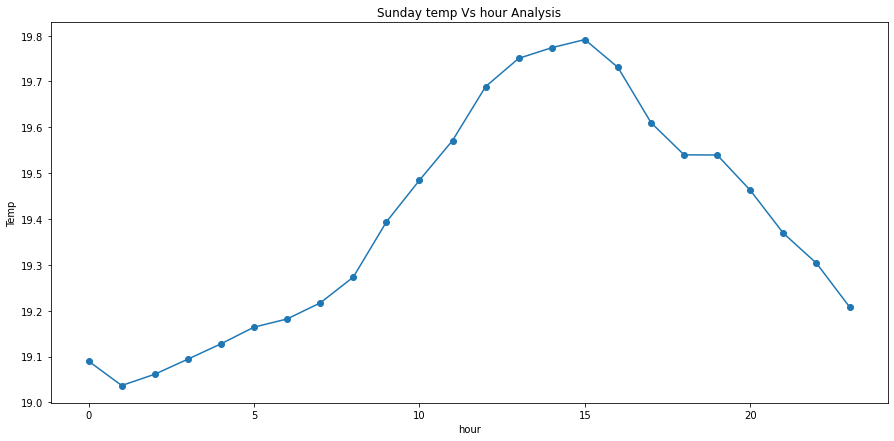

In [ ]:
# Data Visualization
dataByWeekDay = (X1, X2, X3, X4, X5, X6, X7)
daynameList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
feature1 = 'temp'
feature2 = 'hour'

for dayname, X in zip(daynameList, dataByWeekDay):
    plt.figure(figsize=(15,7))
    byh = X.loc[:,[feature1,feature2]].groupby(feature2,as_index=False).mean()
    plt.scatter(byh[feature2],byh[feature1])
    plt.plot(byh[feature2],byh[feature1])
    plt.title(f'{dayname} {feature1} Vs {feature2} Analysis')
    plt.xlabel(feature2)
    plt.ylabel('Temp')
    plt.savefig(f'{dayname} {feature1} Vs {feature2} Analysis.jpg')

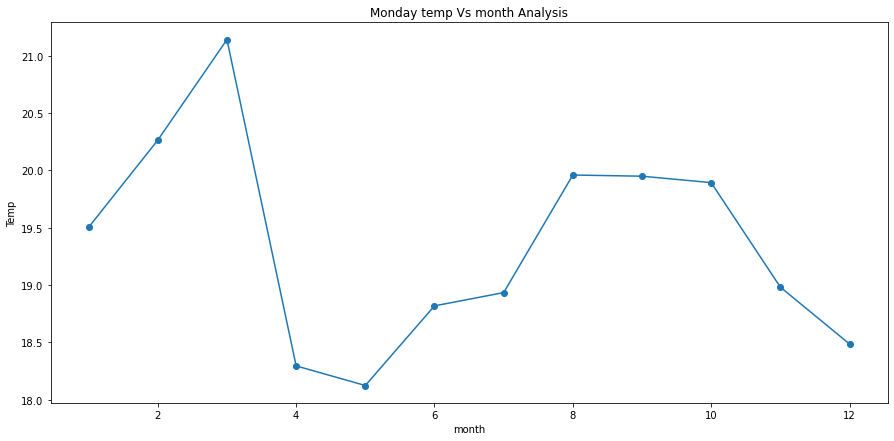

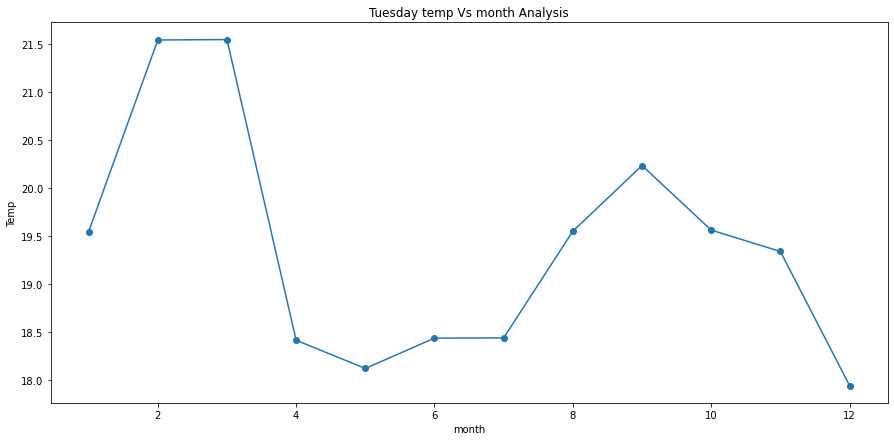

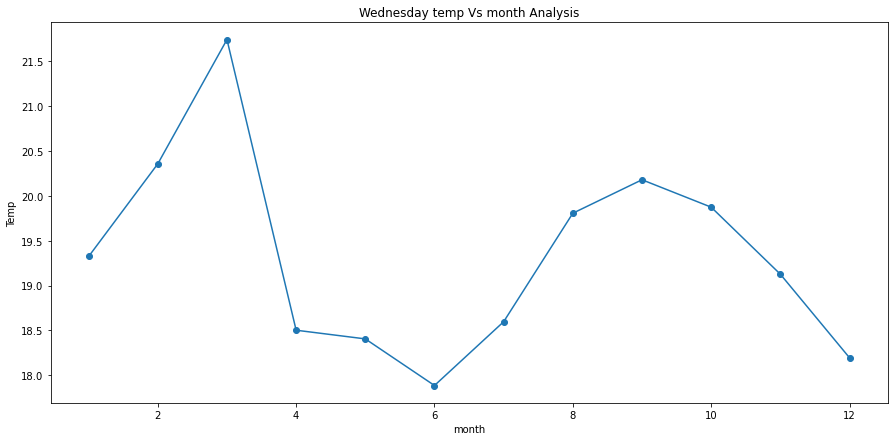

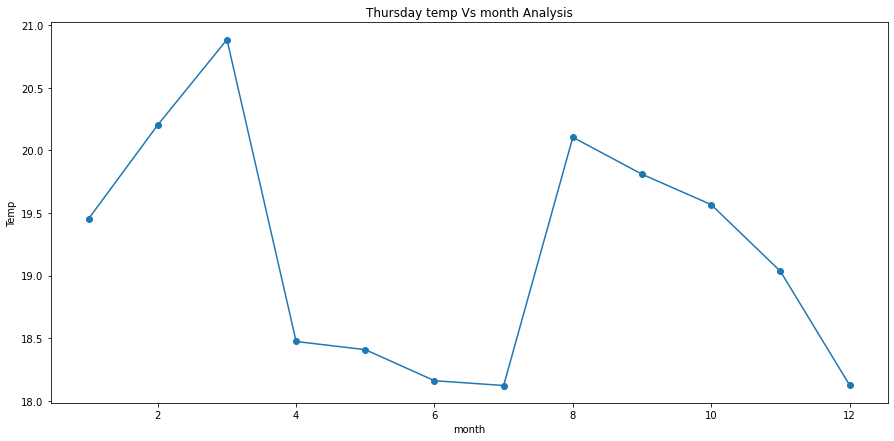

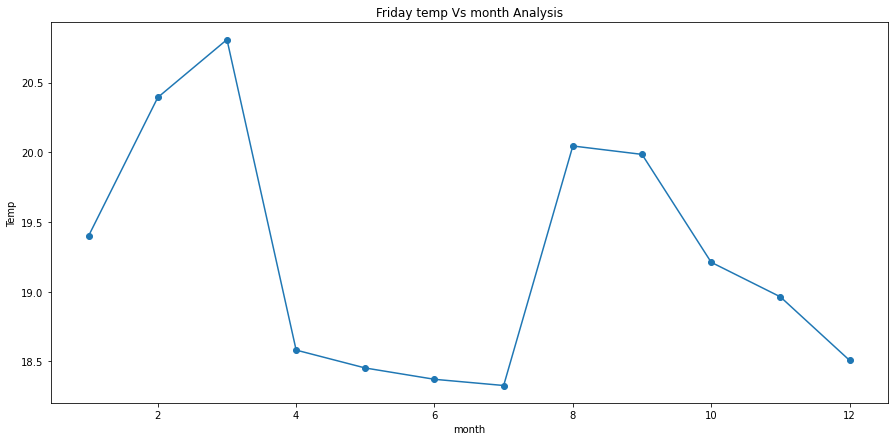

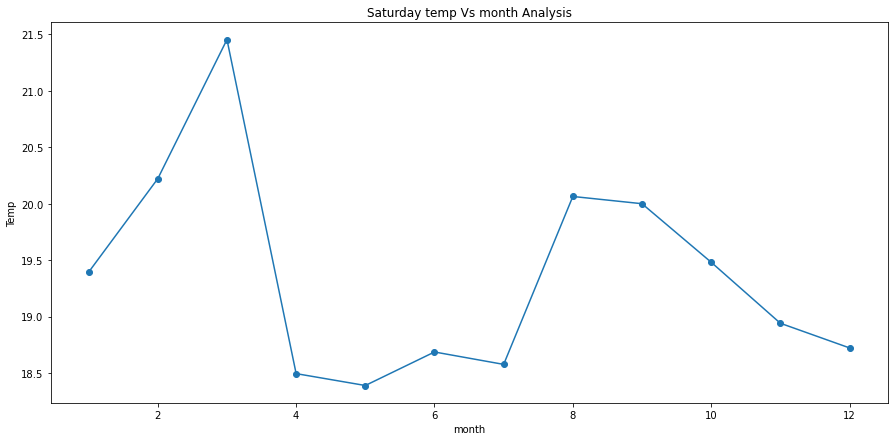

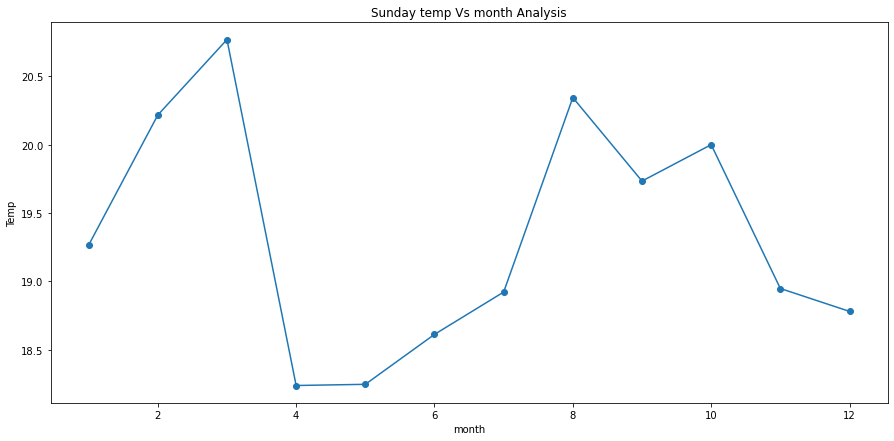

In [ ]:
# Data Visualization
dataByWeekDay = (X1, X2, X3, X4, X5, X6, X7)
daynameList = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
feature1 = 'temp'
feature2 = 'month'

for dayname, X in zip(daynameList, dataByWeekDay):
    plt.figure(figsize=(15,7))
    byh = X.loc[:,[feature1,feature2]].groupby(feature2,as_index=False).mean()
    plt.scatter(byh[feature2],byh[feature1])
    plt.plot(byh[feature2],byh[feature1])
    plt.title(f'{dayname} {feature1} Vs {feature2} Analysis')
    plt.xlabel(feature2)
    plt.ylabel('Temp')
    plt.savefig(f'{dayname} {feature1} Vs {feature2} Analysis.jpg')

,minute,temp,humidity,hour,month
0,0,19.275862,39.586207,0.0,7.362069
1,1,19.275862,39.517241,0.0,7.362069
2,2,19.275862,39.413793,0.0,7.362069
3,3,19.206897,39.534483,0.0,7.362069
4,4,19.172414,39.603448,0.0,7.362069
5,5,19.103448,39.672414,0.0,7.362069
6,6,19.241379,39.568966,0.0,7.362069
7,7,19.155172,39.724138,0.0,7.362069
8,8,19.189655,39.517241,0.0,7.362069
9,9,19.120690,39.551724,0.0,7.362069


Text(0, 0.5, 'Temp')

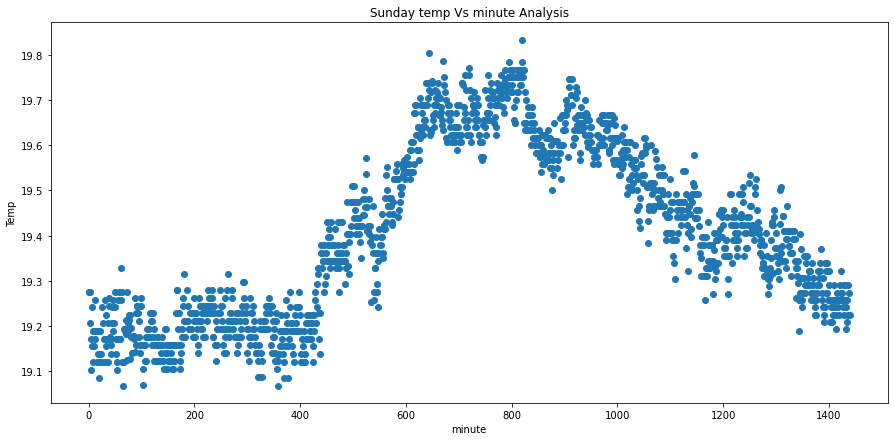

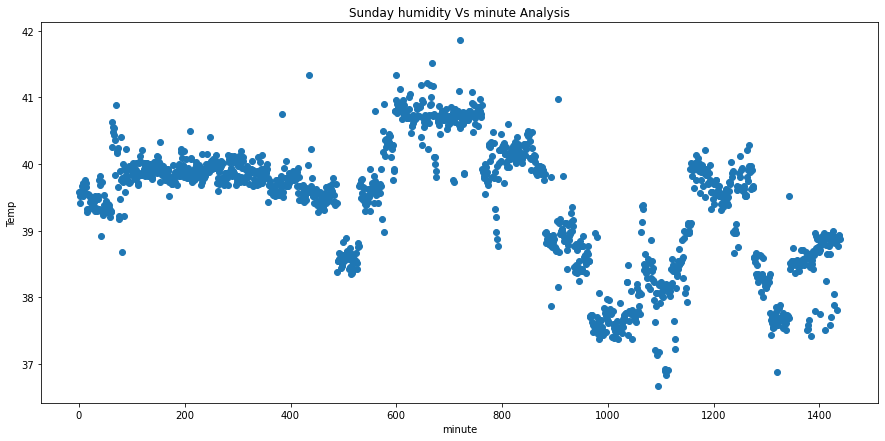

In [ ]:
# Data Modelling by WeekDay
dataX = X1.groupby('minute',as_index=False).mean()
display(dataX.head(10))

feature1 = 'temp'
feature2 = 'minute'
plt.figure(figsize=(15,7))
byh = dataX.loc[:,[feature1,feature2]].groupby(feature2,as_index=False).mean()
plt.scatter(byh[feature2],byh[feature1])
plt.title(f'{dayname} {feature1} Vs {feature2} Analysis')
plt.xlabel(feature2)
plt.ylabel('Temp')

feature1 = 'humidity'
feature2 = 'minute'
plt.figure(figsize=(15,7))
byh = dataX.loc[:,[feature1,feature2]].groupby(feature2,as_index=False).mean()
plt.scatter(byh[feature2],byh[feature1])
plt.title(f'{dayname} {feature1} Vs {feature2} Analysis')
plt.xlabel(feature2)
plt.ylabel('Temp')

In [ ]:
# Data Modelling by WeekDay
featurex = 'minute'
featurey = 'temp'

m1=dataX[[featurex]].values
m2=dataX[featurey].values

print(m1)
print(m2)

[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
[19.27586207 19.27586207 19.27586207 ... 19.29032258 19.27419355
 19.22580645]


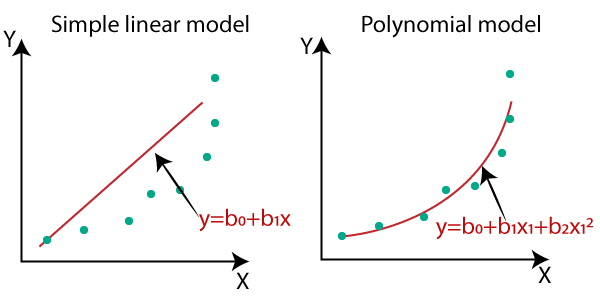

In [ ]:
display(Image(filename='Polynomial Feature Model 01.png'))

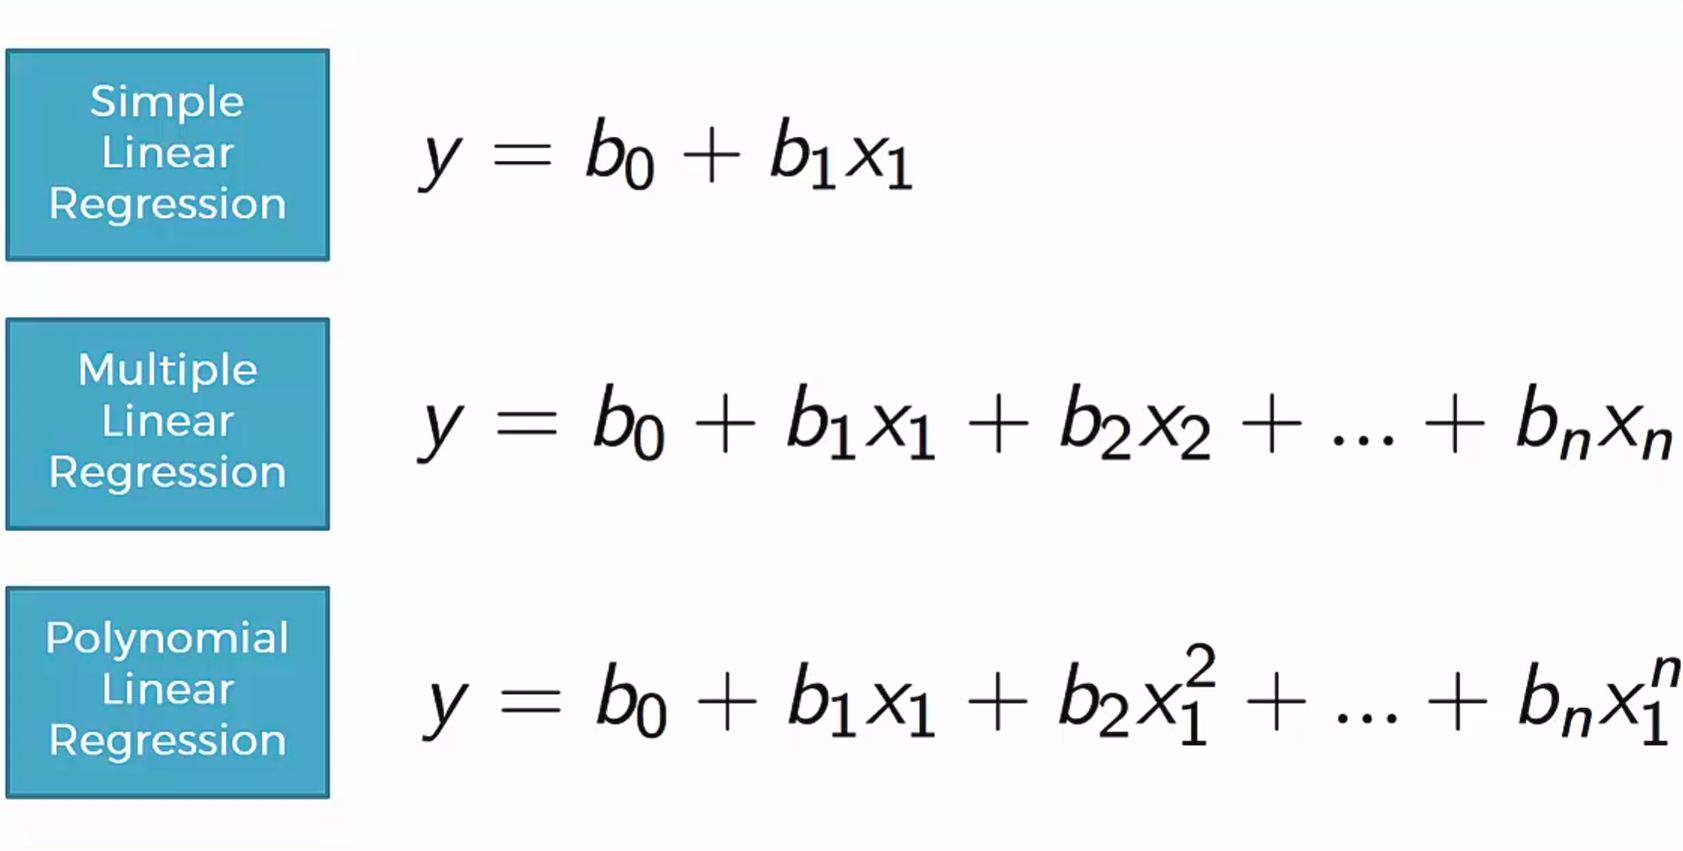

In [ ]:
display(Image(filename='Polynomial Feature Model 02.png'))

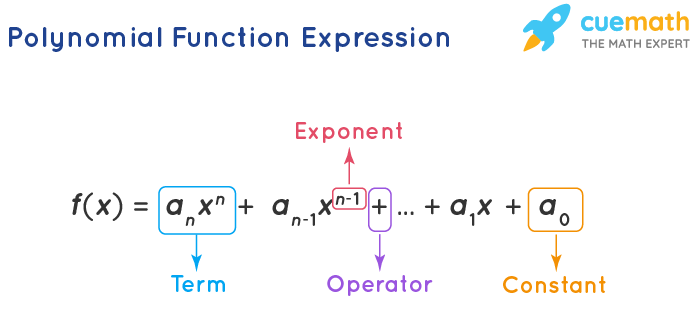

In [ ]:
display(Image(filename='Polynomial Feature Model 03.png'))

In [ ]:
# Machine Learning
# Generate a new feature matrix consisting of all polynomial 
# combinations of the features with degree less than or equal to the specified degree. 
# For example, if an input sample is two dimensional and of the form [a, b], 
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(m1)
print(X_poly[:5])

[[  1.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


temp true value : [19.27586207 19.27586207 19.27586207 ... 19.29032258 19.27419355
 19.22580645]
temp predict value : [19.29875728 19.29642074 19.29410268 ... 19.28972347 19.28999018
 19.29026683]


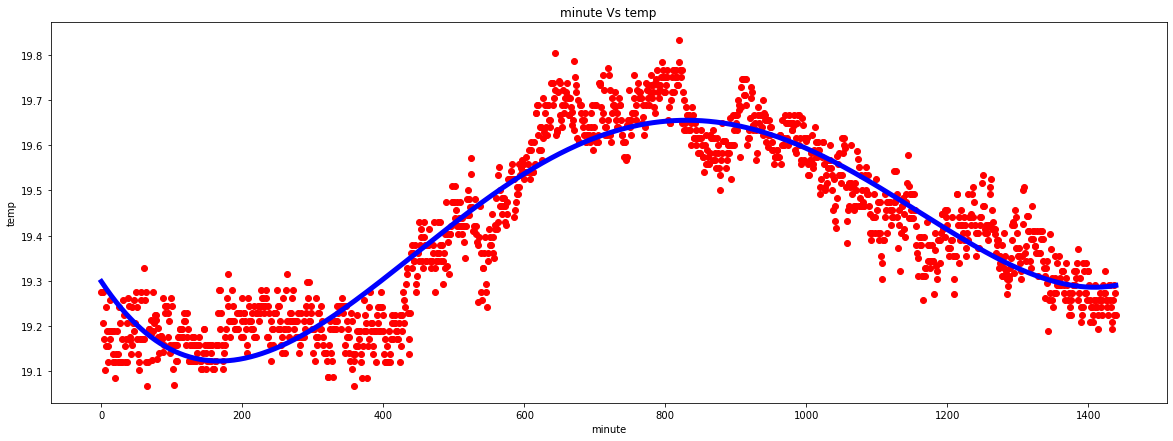

In [ ]:
# Machine Learning
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, m2)

m2_predict = lin_reg.predict(poly_reg.fit_transform(m1))
print(f"{featurey} true value : {m2}")
print(f"{featurey} predict value : {m2_predict}")

feature1 = 'temp'
feature2 = 'minute'
plt.figure(figsize=(20,7))
plt.scatter(m1, m2, color = 'red')
plt.plot(m1, m2_predict, color = 'blue', linewidth=5)
plt.title(f'{feature2} Vs {feature1}')
plt.xlabel(feature2)
plt.ylabel(feature1)
plt.savefig(f"Monday {feature1} Vs {feature2} Analysis.jpg")
plt.show()

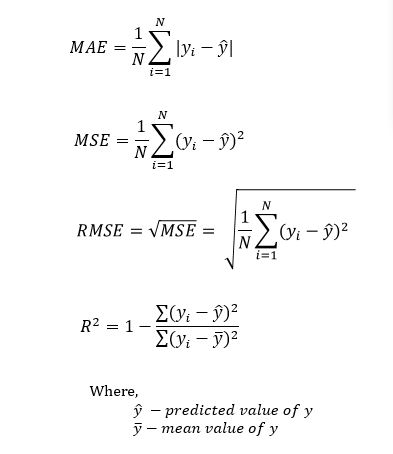

In [ ]:
display(Image(filename='Measurement Accuracy.JPG'))

In [ ]:
# Model Assessment
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Rsquare2 = r2_score(m2, m2_predict)
MSE = mean_squared_error(m2, m2_predict)
MAE = mean_absolute_error(m2, m2_predict)

print(f"Rsquare2 : {Rsquare2}")
print(f"Mean Square Error : {MSE}")
print(f"Mean Absolute Error : {MAE}")

Rsquare2 : 0.8584385411287814
Mean Square Error : 0.0051932649838848195
Mean Absolute Error : 0.05706445802277828


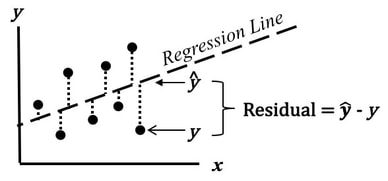

In [ ]:
display(Image(filename='Residual.png'))

<Figure size 1440x360 with 0 Axes>

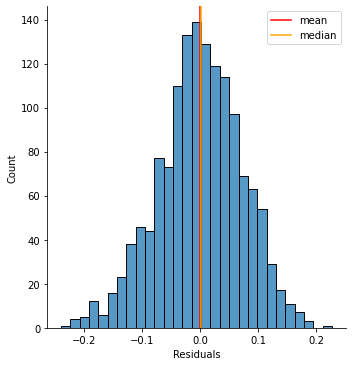

In [ ]:
# Model Assessment
residuals = m2 - m2_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.savefig(f"Monday {feature1} Vs {feature2} Residuals Analysis.jpg")
plt.show()